In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_excel("/content/Concrete_Data.xls")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
df.columns=["Cement","BlastFurnaceSlag","FlyAsh","Water","Superplasticizer","CoarseAggregate","FineAggregate","Age","strength"]

In [ ]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


EDA

1. How to check how many rows and columns are present in the dataset?

In [ ]:
df.shape

(1030, 9)

2. How to check are there any null values in the data set?

In [ ]:
df.isnull().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
strength            0
dtype: int64

3. How to identify the duplicate values in a dataframe?

In [ ]:
df.duplicated().sum()

25

4. How to overcome the duplicate values?

In [ ]:
df.drop_duplicates(inplace=True)
df

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


5. Code for getting the summary of dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1005 non-null   float64
 1   BlastFurnaceSlag  1005 non-null   float64
 2   FlyAsh            1005 non-null   float64
 3   Water             1005 non-null   float64
 4   Superplasticizer  1005 non-null   float64
 5   CoarseAggregate   1005 non-null   float64
 6   FineAggregate     1005 non-null   float64
 7   Age               1005 non-null   int64  
 8   strength          1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [ ]:
df.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


DATA VISUALISATION

In [ ]:
corr = df.corr()
corr['strength'].sort_values(ascending = False)

strength            1.000000
Cement              0.488283
Superplasticizer    0.344225
Age                 0.337371
BlastFurnaceSlag    0.103370
FlyAsh             -0.080648
CoarseAggregate    -0.144710
FineAggregate      -0.186457
Water              -0.269606
Name: strength, dtype: float64

<ipython-input-12-5ae9e03dc42c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cement'])


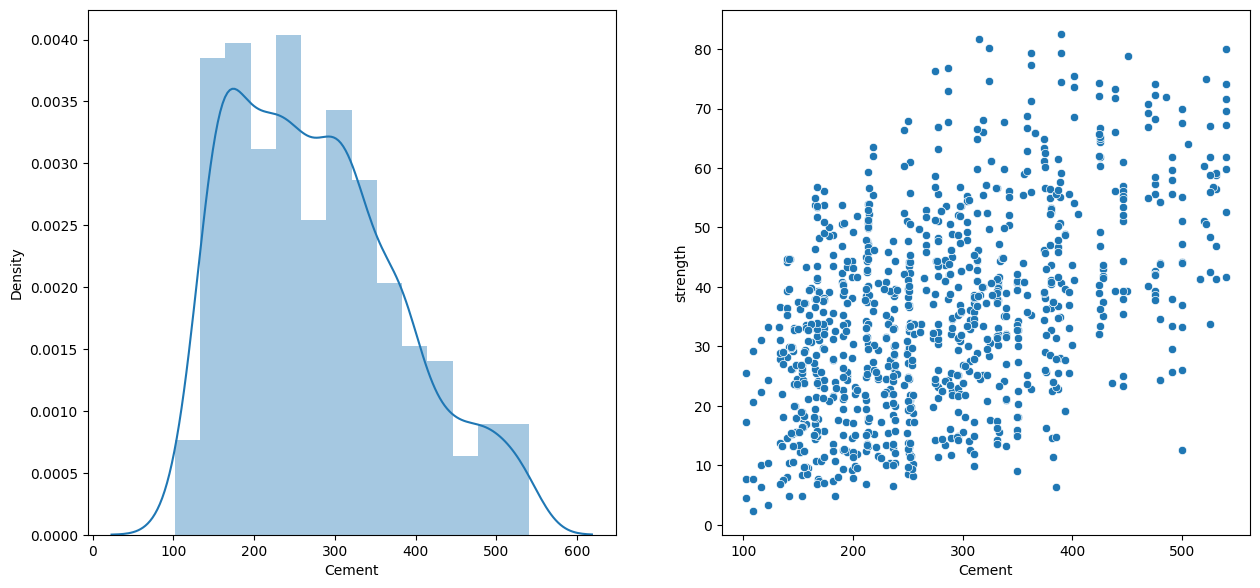

In [ ]:
plt.figure(figsize=[15,15])
plt.subplot(221)
sns.distplot(df['Cement'])
plt.subplot(222)
sns.scatterplot(x='Cement', y='strength',data=df)
plt.show()

<ipython-input-13-0dc2b963fcd0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Water'])


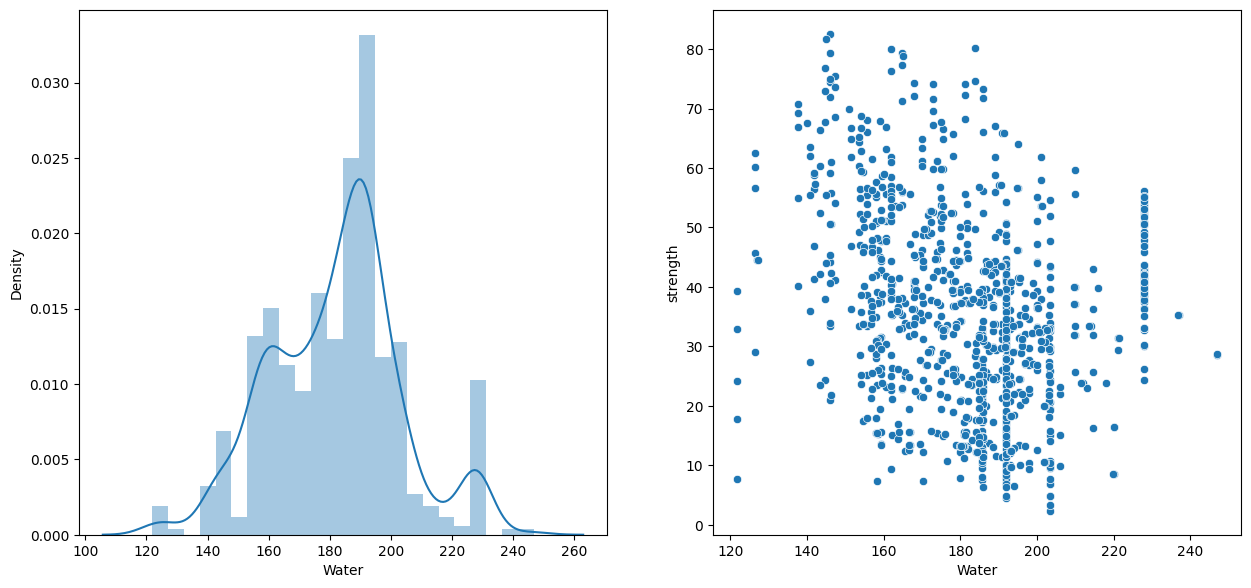

In [ ]:
plt.figure(figsize=[15,15])
plt.subplot(221)
sns.distplot(df['Water'])
plt.subplot(222)
sns.scatterplot(x='Water',y='strength',data=df)
plt.show()

<ipython-input-14-2349935779dc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Superplasticizer'])


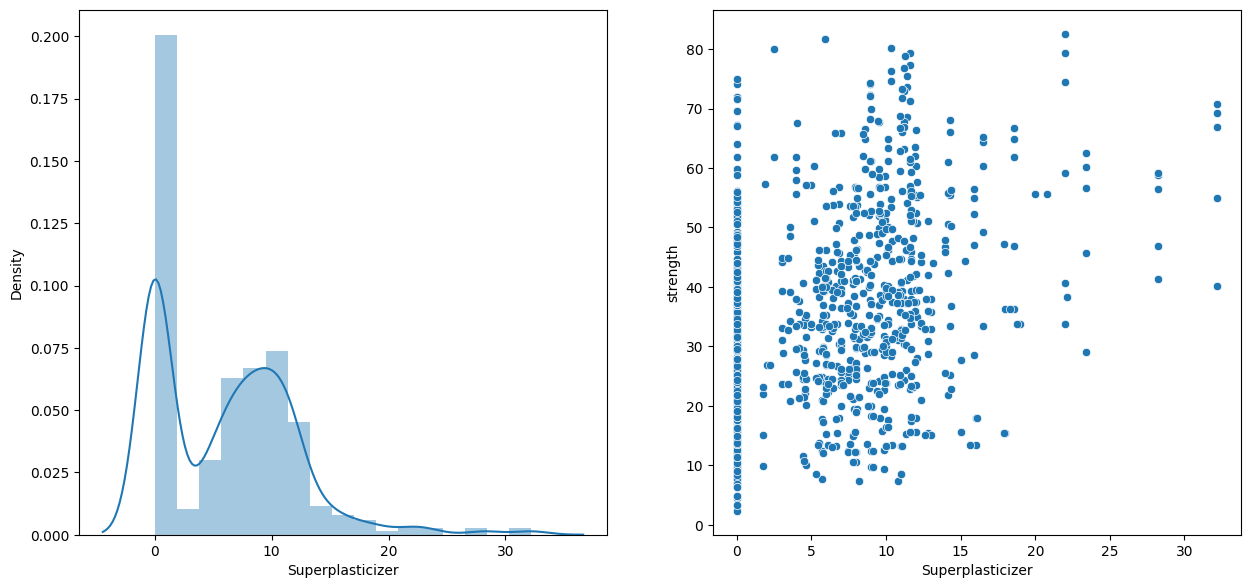

In [ ]:
plt.figure(figsize=[15,15])
plt.subplot(221)
sns.distplot(df['Superplasticizer'])
plt.subplot(222)
sns.scatterplot(x='Superplasticizer',y='strength',data=df)
plt.show()

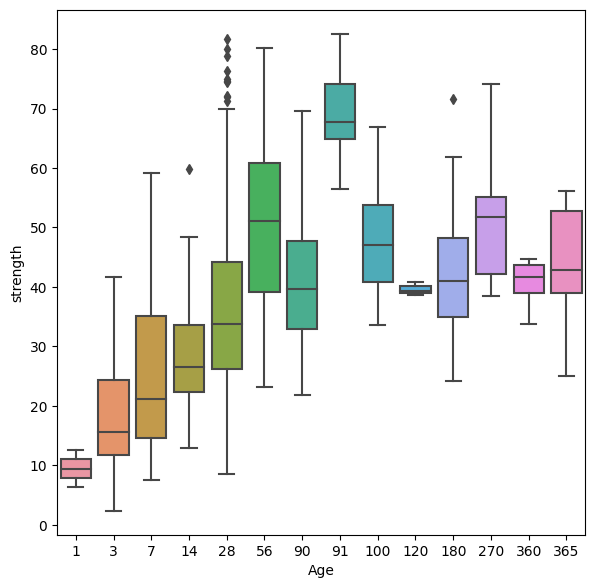

In [ ]:
plt.figure(figsize=[15,15])
plt.subplot(221)
sns.boxplot(x='Age',y='strength',data=df)
plt.show()

In [ ]:
#sns.pairplot(df)
#plt.show()

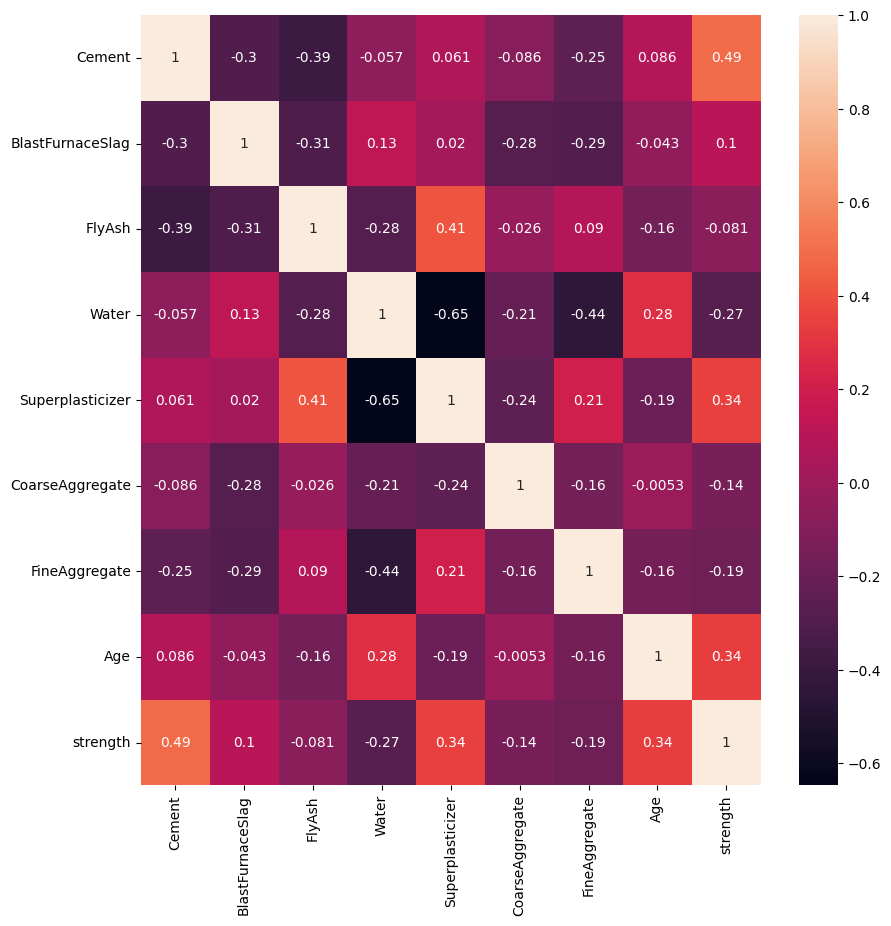

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

MODEL BUILDING


1. LINEAR REGRESSION

In [ ]:
X = df.drop('strength', axis=1)
y = df['strength']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Creating a linear regression model
model = LinearRegression()

In [ ]:
#Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Making predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate Mean Absolute Error (MAE)
mae1 = mean_absolute_error(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae1)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Squared Error: 125.265338276725
Mean Absolute Error: 8.896027820458997
Root Mean Squared Error: 11.19219988548833
R-squared (R²): 0.580108901995383


2. RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create a random forest regression model
model = RandomForestRegressor()

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate Mean Absolute Error (MAE)
mae2 = mean_absolute_error(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae2)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Squared Error: 26.350377174504075
Mean Absolute Error: 3.4890318381016554
Root Mean Squared Error: 5.133261845503703
R-squared (R²): 0.9116731814494758


3. KNN REGRESSOR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)

In [ ]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate Mean Absolute Error (MAE)
mae3 = mean_absolute_error(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae3)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Squared Error: 89.59711037466813
Mean Absolute Error: 7.233026334203217
Root Mean Squared Error: 9.465575015532238
R-squared (R²): 0.6996692814563655


4. SUPPORT VECTOR REGRESSOR

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR()

In [ ]:
model.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate Mean Absolute Error (MAE)
mae4 = mean_absolute_error(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae4)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Squared Error: 238.03118187441322
Mean Absolute Error: 12.311563862046931
Root Mean Squared Error: 15.428259197797178
R-squared (R²): 0.20211627820147926


5. GRADIENT BOOSTING

In [ ]:
# Split the data into training and testing sets
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Create a Gradient Boosting Regressor model with desired hyperparameters
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gbr.predict(X_test)
y_pred

array([25.17646875, 24.96499246, 22.52590537, 37.92288629, 45.83023594,
       31.33189331, 21.99459149, 22.70576564, 32.48945008, 33.02548698,
       28.07135852, 29.68193255, 39.10333617, 43.95371755, 33.88824148,
       16.04085485, 36.50097238, 51.12616215, 46.65157599, 36.58119562,
       35.54027447,  9.79078005, 42.9175691 , 32.03426875,  7.68682228,
       35.58055793, 58.50811802, 34.180739  , 18.88523034, 50.4018831 ,
       42.74517844, 48.58159055, 51.53611808, 46.37438198, 14.47986293,
       41.66610815, 46.05640889, 45.90075662, 41.92493258, 78.9001692 ,
       38.3925206 , 31.58270659, 41.29959809, 47.41048026, 54.83771855,
       50.74321764, 60.43103025, 25.23005673, 54.66434051, 37.9955686 ,
       21.21980749, 52.12812526, 37.02894798,  7.86240578, 30.99993226,
       34.60735109, 55.11742963, 12.43622863, 35.41400081, 50.30372117,
       34.89845245, 37.7554558 , 37.55425181, 32.00304274, 45.17566539,
       55.12247558, 38.12143649, 37.47021593, 55.73279   , 52.50

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae5 = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae5)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error: 4.090659140360406
Mean Squared Error: 30.43872933982858
Root Mean Squared Error: 5.517130534963676
R-squared (R²): 0.8979689700263976


6. DECISION TREE REGRESSOR

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create a Decision Tree Regressor model
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)
y_pred

array([19.00885332, 20.59395864, 17.96429718, 42.42345828, 44.0919902 ,
       39.300132  , 22.34798559, 26.25800398, 33.70158688, 35.3011712 ,
       28.99108685, 22.62998127, 39.48629052, 38.01770664, 44.63667624,
       17.54026944, 39.38286912, 52.82075636, 51.03501352, 36.83870268,
       33.79811352, 12.73462172, 40.2309246 , 48.28400428,  6.46728488,
       42.29245784, 79.98611076, 34.67374804, 15.81657944, 44.52360218,
       43.94237391, 58.78472376, 50.51101176, 45.08483564, 15.04919265,
       37.79707432, 49.77327244, 49.97322048, 43.58177796, 79.40005616,
       44.52045028, 27.923778  , 37.99702236, 41.05140104, 56.8472962 ,
       44.14025352, 79.98611076, 36.4388066 , 60.28088668, 46.24315532,
       21.81984697, 54.31554033, 37.72192144,  9.73126426, 33.94772981,
       37.42475728, 53.57917996, 13.66403537, 39.35804798, 52.90831981,
       29.07313449, 38.56239268, 43.25082948, 30.12320644, 45.2985732 ,
       59.59042572, 45.3675208 , 35.34253976, 62.93536928, 47.22

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae6 = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae6)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error: 3.804436931871582
Mean Squared Error: 35.835321141081984
Root Mean Squared Error: 5.98626103181961
R-squared (R²): 0.8798795217553588


7. ADA BOOST


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
# Assuming you have a dataset (X, y), replace this with your actual dataset
# For demonstration, let's create a random dataset

# Split the data into training and testing sets


# Initialize the AdaBoost regressor without specifying the base estimator
adaboost_regressor = AdaBoostRegressor(n_estimators=100,learning_rate=0.1)

# Train the AdaBoost regressor
adaboost_regressor.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_regressor.predict(X_test)
# Calculate Mean Absolute Error (MAE)
mae7 = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae7)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)


Mean Absolute Error: 6.761420636730819
Mean Squared Error: 71.58141025466138
Root Mean Squared Error: 8.460579782418069
R-squared (R²): 0.7600581504665656


8. XG BOOST

In [ ]:
from xgboost import XGBRegressor
# Assuming you have a dataset (X, y), replace this with your actual dataset
# Split the data into training and testing sets


# Initialize the XGBoost regressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1)

# Train the XGBoost regressor
xgb_regressor.fit(X_train, y_train)

# Make predictions
y_pred = xgb_regressor.predict(X_test)
# Calculate Mean Absolute Error (MAE)
mae8 = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae8)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):", r_squared)

Mean Absolute Error: 2.9327385864113493
Mean Squared Error: 20.758514502114636
Root Mean Squared Error: 4.556151281741491
R-squared (R²): 0.9304171803058371


COMPARING ALL MODELS

In [ ]:
mae_values = {
    'Model': ['LinearRegression', 'RandomForestRegressor', 'KNeighborsRegressor','SVR','GradientBoostingRegressor',' DecisionTreeRegressor','AdaBoostRegressor','XGBRegressor'],  # Replace with your model names
    'MAE': [mae1,mae2,mae3,mae4,mae5,mae6,mae7,mae8]  # Replace with your actual MAE values
}

# Create a DataFrame
mae_df = pd.DataFrame(mae_values)
mae_df_sorted = mae_df.sort_values(by='MAE')

# Display the DataFrame
print(mae_df_sorted)

                       Model        MAE
7               XGBRegressor   2.932739
1      RandomForestRegressor   3.489032
5      DecisionTreeRegressor   3.804437
4  GradientBoostingRegressor   4.090659
6          AdaBoostRegressor   6.761421
2        KNeighborsRegressor   7.233026
0           LinearRegression   8.896028
3                        SVR  12.311564



VARIANCE INFLATION FACTOR

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(X)

,variables,VIF
0,Cement,15.155077
1,BlastFurnaceSlag,3.261879
2,FlyAsh,4.171453
3,Water,81.395278
4,Superplasticizer,5.171809
5,CoarseAggregate,84.738626
6,FineAggregate,72.495779
7,Age,1.696228


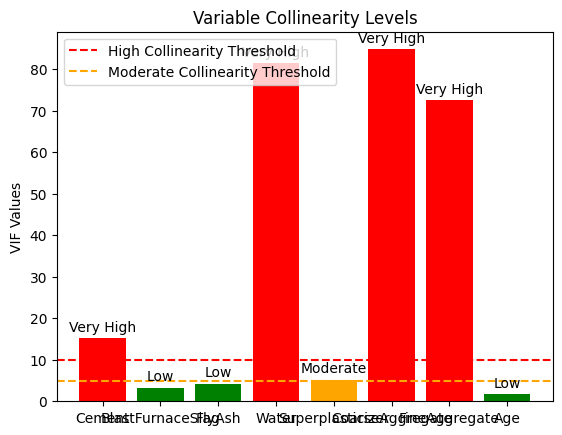

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of variable names and their corresponding VIF values
variable_names = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Age']
vif_values = [15.16, 3.26, 4.17, 81.40, 5.17, 84.74, 72.50, 1.70]

# Define threshold values for categorization
high_threshold = 10
moderate_threshold = 5

# Categorize variables based on VIF values
collinearity_levels = ['Very High' if vif > high_threshold else 'Moderate' if vif > moderate_threshold else 'Low' for vif in vif_values]

# Create a bar plot
fig, ax = plt.subplots()
bar_colors = ['red' if level == 'Very High' else 'orange' if level == 'Moderate' else 'green' for level in collinearity_levels]
bars = ax.bar(variable_names, vif_values, color=bar_colors)

# Add labels and title
ax.set_ylabel('VIF Values')
ax.set_title('Variable Collinearity Levels')
ax.axhline(y=high_threshold, color='red', linestyle='--', label='High Collinearity Threshold')
ax.axhline(y=moderate_threshold, color='orange', linestyle='--', label='Moderate Collinearity Threshold')
ax.legend()

# Annotate bars with collinearity levels
for i, (bar, level) in enumerate(zip(bars, collinearity_levels)):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, level, ha='center', va='bottom')

# Show the plot
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def build_model():
    model = models.Sequential([
        layers.Dense(64, activation='linear', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='linear'),
        layers.Dense(1)  # No activation for regression
    ])

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model()

In [ ]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2, verbose=2)

Epoch 1/150
21/21 - 9s - loss: 1467.6072 - mae: 34.9657 - val_loss: 1423.4663 - val_mae: 35.0301 - 9s/epoch - 427ms/step
Epoch 2/150
21/21 - 0s - loss: 1359.4900 - mae: 34.0575 - val_loss: 1312.0419 - val_mae: 33.9490 - 141ms/epoch - 7ms/step
Epoch 3/150
21/21 - 0s - loss: 1212.3198 - mae: 32.4629 - val_loss: 1163.9847 - val_mae: 32.1322 - 173ms/epoch - 8ms/step
Epoch 4/150
21/21 - 0s - loss: 1039.1897 - mae: 30.1021 - val_loss: 982.0146 - val_mae: 29.3502 - 137ms/epoch - 7ms/step
Epoch 5/150
21/21 - 0s - loss: 834.5762 - mae: 26.7836 - val_loss: 755.9459 - val_mae: 25.4450 - 150ms/epoch - 7ms/step
Epoch 6/150
21/21 - 0s - loss: 616.8534 - mae: 22.6276 - val_loss: 543.5269 - val_mae: 21.0081 - 157ms/epoch - 7ms/step
Epoch 7/150
21/21 - 0s - loss: 410.0034 - mae: 17.9659 - val_loss: 337.8793 - val_mae: 16.0906 - 156ms/epoch - 7ms/step
Epoch 8/150
21/21 - 0s - loss: 237.3262 - mae: 13.0158 - val_loss: 188.6854 - val_mae: 11.7550 - 87ms/epoch - 4ms/step
Epoch 9/150
21/21 - 0s - loss: 140.

In [ ]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_mse_score}\nTest MAE: {test_mae_score}")

7/7 [==============================] - 0s 3ms/step - loss: 120.9935 - mae: 8.4697
Test MSE: 120.99347686767578
Test MAE: 8.469736099243164


In [ ]:
predictions = model.predict(X_test)
print(predictions.flatten())

7/7 [==============================] - 0s 2ms/step
[59.704327 27.766558 36.898346 19.667847 23.59239  29.005173 11.131764
 26.042662 34.502316 36.07598  33.52238  40.620888 33.45471  32.259087
 18.490517 32.931503 19.423113 23.559645 39.321194 43.901836 24.437183
 31.60943  32.302837 22.789045 42.67379  28.979097 35.275204 48.451126
 32.248177 35.81251  23.788374 34.544376 54.15681  48.70696  50.533436
 51.90167  24.193598 51.594467 30.008402 28.479937 25.621222 24.794937
 22.972462 72.78738  15.513379 29.01804  26.03454  37.520603 22.52027
 27.40521  25.363638 50.283054 32.10505  22.93749  22.516073 58.487423
 38.664936 29.701273 15.189297 38.401966 24.44093  17.572744 23.12086
 33.508728 21.340136 32.010365 20.478998 25.217321 43.774513 30.566954
 49.663795 27.935413 25.26217  36.03088  23.022518 67.021645 71.92219
 29.949041 26.44837  49.826664 26.640799 52.920822 22.935028 61.405243
 42.97877  29.835514 43.016922 55.904533 31.872536 30.282434 31.904366
 35.02908  62.789543 34.81838

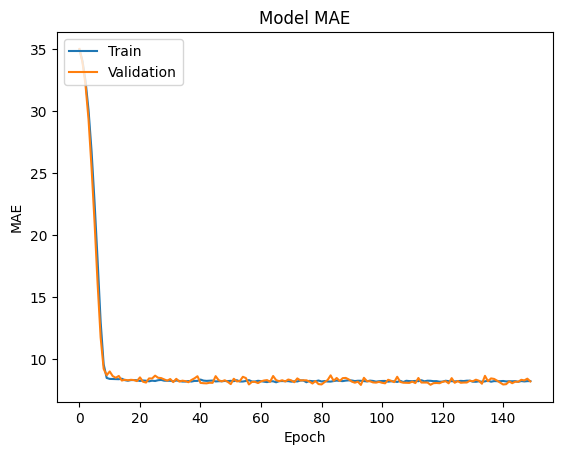

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

7/7 [==============================] - 0s 2ms/step


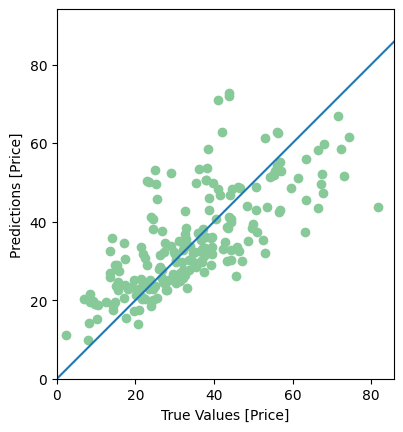

In [ ]:
# Make predictions
predictions = model.predict(X_test).flatten()

# Plotting true labels vs predicted labels
plt.scatter(y_test, predictions, color = '#88c999')
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
# plt.legend()
plt.show()
